# Notebook of Tasks for Module Applied Statistics as part of Higher Diploma in Computer Science and Data Analytics

## Task 1

### Problem 1

Using the Lady tasting Tea experiment, calculate the probability of the lady being able to select all cups of tea where milk was put in the cup before the tea. There are 12 cups in total. 6 of which will have been made with milk being used first and the other 6 with tea first. 

In [2]:
# Import necessary modules

import math
import random
import itertools
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

c:\Users\kolea\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
# Variables

total_cups = 12

#Milk first cups
number_milk_first = 6

#Tea first cups
number_tea_first = 6

In [4]:
# Total number of ways to select any 6 cups out of the 12. The order of the cups chosen doesnt matter

ways_of_combining_all_cups = 12*11*10*9*8*7
ways_of_combining_all_cups

665280

In [5]:
# Assuming selecting just the milk first cups is a success. Then the number of ways these could be chosen in any order is:

no_successes = 6*5*4*3*2*1
no_successes


720

In [6]:
# The total combinations of selecting 6 cups out of 12 
six_out_of_twelve = ways_of_combining_all_cups // no_successes
six_out_of_twelve



924

In [7]:
#Probabiltiy

prob_six = 1/six_out_of_twelve
prob_six

0.0010822510822510823

With no special ability to select milk-first cups, the lady would have a 1 in 924 chance or .108% probability of selecting just the 6 milk-first cups

### Problem 2

By choosing 5/6 of the cups correctly it might still show an ability to discern between the two categories of tea. So we will allow one mistake. This means we need to calculate the probability for 2 scenarios

- getting all 6 correct
- getting 5 out of 6 correct

Once we have these we can add them together.

Instead of using the above calculations we will use the function math.comb() which uses the formula:

$$ 
\frac{n!}{k!(n-k)!}
$$

We already have the probability of getting all 6 correct from Problem 1.

1/924 or .108%

Now we need to find the number of ways to select 5 correct cups out of 6

In [8]:
# total combinations for 5 out of 6 cups correct
# n = 6, k = 5
five_out_of_six = math.comb(6,5)
five_out_of_six


6

In [9]:
# total combinations for 1 out of 6
# n = 6, k = 1

one_out_of_six = math.comb(6,1)
one_out_of_six

6

In [10]:
#Probability of picking 5 out 6 cups correctly given 12 cups total

prob_five = (five_out_of_six * one_out_of_six) / six_out_of_twelve
prob_five

0.03896103896103896

The probability of picking 5 out of 6 correctly rises to 36/924 or 3.89%

The scenario where either 5/6 or 6/6 is a success is calculated by adding the two together

In [11]:
Answer = prob_six+prob_five
Answer

0.04004329004329004

If allowing for one error, the probability of selecting all 6 Milk-first cups or 5 of the Milk-first cups is 37/924 or 4%

Would you allow errors?

We now need to find the odds of choosing 4 out of 6 correct

In [12]:
# total combinations for 4 out of 6 cups correct
# n = 6, k = 4
four_out_of_six = math.comb(6,4)
four_out_of_six


15

In [13]:
# total combinations for 2 out of 6
# n = 6, k = 2

two_out_of_six = math.comb(6,2)
two_out_of_six

15

In [14]:
#Probability of picking 4 out 6 cups correctly given 12 cups total

prob_four = (four_out_of_six * two_out_of_six) / six_out_of_twelve
prob_four

0.2435064935064935

In [15]:
#Probability of picking at least 4 out 6 cups correctly
prob_total = prob_six+prob_five+prob_four
prob_total

0.28354978354978355

The odds of just getting 4 of the 6 choices correct is 24.3%. If accepting anything over 4 cups correct the probability is over 28% and is not a strong statistical indicator of any ability to discern between the two categories of tea.  

## Task 2

Numpy Normal Distribution


In [16]:
# Generate 100,000 values using numpys random generator
#https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

mean = 10.0
sigma = 3.0 #standard deviation

values = np.random.normal(10, 3.0, 100000)
values

array([11.82317598,  9.88437164, 10.07890184, ..., 11.01990682,
       10.19689124, 13.06218556])

### Shapiro wilks test

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

This checks if an array fits a normal distribution. It will give 2 outputs, a statistic value and a p-value. 

The statistic value ranges from 0-1 and measures how closely your data fits the bell curve of a normal distribution. A value closer to 1 means your vales are closer to a normal distribution.

The null hypothesis in this case is that the data is normally distributed. The P-value gives a probability that your values could look like they do if they come from a normal distribution. Anything below .05 would be strong evidence that your values arent 'normal'.

In [17]:

# Checks if the values produced fit a normal distribution

statistic, p_values = stats.shapiro(values)
statistic

print("As the statistic value {} is approaching 1 it fits a bell curve.  The p-value {} is high and would suggest it gits a normal distribution. However the p-value may not be accurate with a number of values over 5000.".format(statistic, p_values))

As the statistic value 0.9999449253082275 is approaching 1 it fits a bell curve.  The p-value 0.072608083486557 is high and would suggest it gits a normal distribution. However the p-value may not be accurate with a number of values over 5000.


c:\Users\kolea\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


As the statistic value ${statistic}$ is approaching 1 it fits a bell curve. 

The p-value {p_value} is very high and would suggest it gits a normal distribution. However the p-value may not be accurate with a number of values over 5000.

### Plot data on histogram

Text(0.5, 1.0, 'Histogram showing the distribution of np.random.normal')

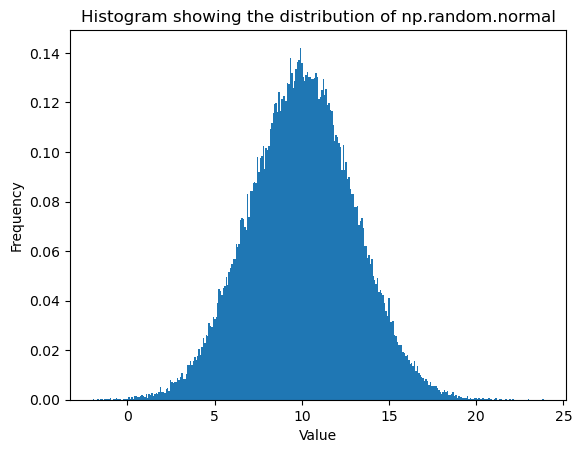

In [18]:
# number of bins

b = int(np.sqrt(100000))

#plot

plt.hist(values, b, density=True)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram showing the distribution of np.random.normal')

In the above plot we can see see the generated values seem to fit a bell curve suggestion a normal distribution. Next we will plot the probability density function for a normal distribution

### Probability Density Function

$$ f(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x -\mu)^2}{2 \sigma^2}} $$

$\sigma$ = standard deviation

$\mu$ = mean


In [19]:
def f(x):
  sigma = 3
  mu = 10.0
  norm = 1.0 / np.sqrt(2.0*np.pi * sigma**2)
  return norm * np.exp(-(x -mu)**2 / (2.0 * sigma**2))

In [20]:
#y = f(values)

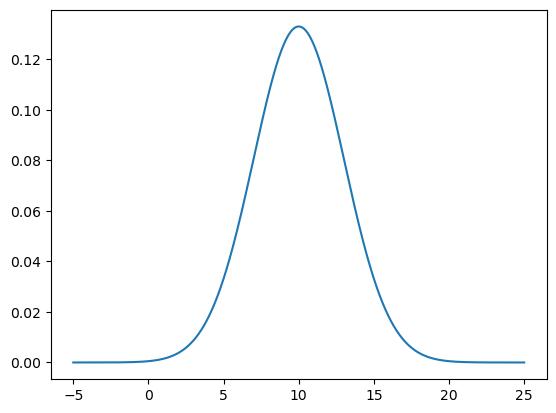

In [21]:
# Create plot
fig, ax = plt.subplots()

# Create x range
x = np.linspace(-5, 25, 100001) # The histogram above shows values between -5 and 25

#y values

y = f(x)

ax.plot(x, y)

In order to overlay the lineplot on the histogram we need to normalise the values for the histogram. This can be done by using the Density parameter in the plt.hist() function. 

density=True converts the histogram from showing absolute frequenices to probability. This means that the histogram and line plot will be on the same scale
 

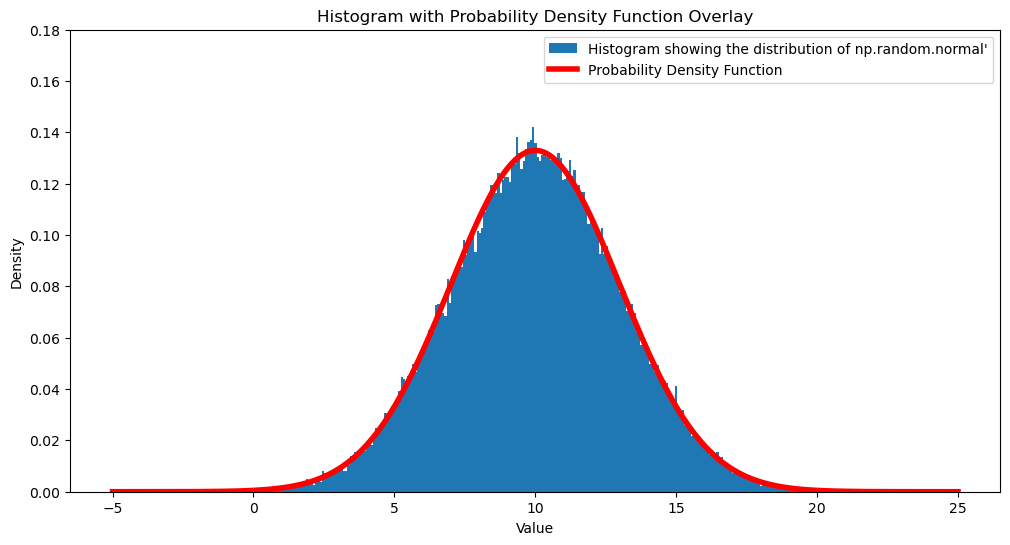

In [22]:
# Create plot
fig, ax = plt.subplots(figsize=(12, 6))

#Histogram
ax.hist(values, bins=b, density=True, label ="Histogram showing the distribution of np.random.normal'")


ax.plot(x, y, c='red', linewidth=4, label="Probability Density Function") #increased linewidth to make it more visible

# Labels and title
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram with Probability Density Function Overlay')
plt.legend(loc='upper right') # move legend out of the way

plt.ylim(top=0.18) #adjusting the y axis to give some room for the legend

# Show the combined plot
plt.show()



# Task 3 

t-Test Calculations

Below is a table of resting heart rates before and after a two week excercise programme. 

| Patient ID | 0  | 1  | 2  | 3  | 4  | 5  | 6  | 7  | 8  | 9  |
|------------|----|----|----|----|----|----|----|----|----|----|
| Before     | 63 | 68 | 70 | 64 | 74 | 67 | 70 | 57 | 66 | 65 |
| After      | 64 | 64 | 68 | 64 | 73 | 70 | 72 | 54 | 61 | 63 |


I am going to calculate the t-statistic for these results. I will first use the package ttest.rel from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#ttest-rel) and then calculate it with python.

The [t-statistic](https://www.statisticshowto.com/t-statistic) is a way of measuring if two groups of data are significantly different from each other.

There are [3](https://www.jmp.com/en_ch/statistics-knowledge-portal/t-test.html) different types of t-tests;
- a one sample t-test: This is comparing a single group to an already known value. 
- an independent t-test: This is comparing how two separate groups differ from each other. 
- a paired t-test: This compares the means of two related groups. An example would be before and after scenarios like we are dealing with in this question. 

In this context the question is examining if the two week excercise programme had an affect on resting heart rates.  If it has an affect we would expect a statistically significant difference (either positive or negative), if the difference is small and could be explained by random chance then the t-statistic will be small.



The formula for a paired samples T-test is;

$t = \dfrac{Σ(x_{1}-x_{2})}{\dfrac{s}{\sqrt{n}}}$

where;
- $Σ(x_{1}-x_{2})$ is the difference between the means for sample 1 and sample 2
- $s$ is the standard deviation
- $n$ is the number of values in a sample

In [23]:
#create the different groups as arrays

before = np.array([63,68,70,64,74,67,70,57,66,65])
after = np.array([64,64,68,64,73,70,72,54,61,63])

c:\Users\kolea\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kolea\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kolea\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: >

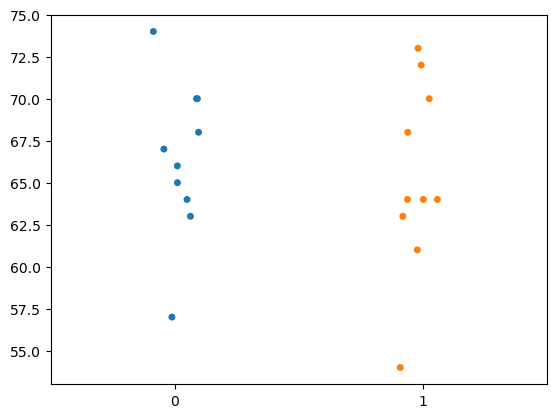

In [24]:
# stripplot of the values 
sns.stripplot(data=[before, after])

The first part of the equation requires the difference of means


In [25]:
differences = before - after
differences

array([-1,  4,  2,  0,  1, -3, -2,  3,  5,  2])

In [26]:
diff_mean = sum(differences)/len(differences)
diff_mean

1.1

Next we need the standard deviation or $s$

In [27]:
#calculate standard deviation using numpy

std = np.std(differences)
std

2.467792535850613

In [28]:
#n is the number of samples

n = len(differences)
n

10

In [29]:
manual_t = diff_mean/(std/np.sqrt(n))
manual_t

1.4095615314705645

In [30]:
# scipy t_test

scipy_t, pvalue = stats.ttest_rel(before, after)
scipy_t

1.337227482480628

In this case the manual t-test gave a result of 1.409 versus the scipy-t of 1.337. 

After doing some further research in the [documnetation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html) the scipy model uses a degrees of freedom value which is one less than the sample size. So in this case 9. I didnt account for this when calculating the standard deviation myself. 

Using Numpys standard deviation function you can select the degree of function offset (ddof). This si then deducted from the sample size to give the df. I have recalculated below with this in mind.

In [31]:
#settting ddof to 1 will give a df of 9.

std_v2 = np.std(differences, ddof=1)
std_v2

2.6012817353502227

In [32]:
corrected_manual_t = diff_mean/(std_v2/np.sqrt(n))
corrected_manual_t

1.3372274824806283

Now we have the same value as the scipy ttest_rel functionw as producing.

0.05 is a common significance level. This would mean there is a 5% chance of the results being random chance. In our case the pvalue is 0.2139, significanlty higher that this. It would indicate no statistically significant impact from the two week exercise programme. 

## Task 4. 

ANOVA

ANOVA (Anaylsis of Variance) like t-tests is a statistical tool used to compare variance across multiple groups. T-tests can be used when comparing two groups where as ANOVA can be used for multiple groups. 

As with T-tests the null hypothesis is that the samples are from the same group.

A Type 1 error is when the null hypothesis is rejected incorrectly - a false positive.

A type 2 error is when the null hypothesis is false but it is not rejected - a false negative. 

In this task we want to count how many typeII errors there are over 10000 simulations

In [ ]:
#Create variable
no_type_ii = 0

#Set alpha, 
alpha = .05


In [ ]:

# for loop to produce samples and perform anova

for i in range(10000):
  # create 3 sample groups
  first = np.random.normal(4.9, 0.1, 100)
  second = np.random.normal(5.0, 0.1, 100)
  third = np.random.normal(5.1, 0.1, 100)

  #perform anova
  f, p = stats.f_oneway(first, second, third)

  if p >= alpha:
    no_type_ii +=1
  no_type_ii

no_type_ii


0

According to the above calculation there are no type II errors. As we have prior knowledge of the dataset having set the means ourselves, we know that the groups are different. So the null hypothesis is incorrect which this formula is correctly calculating. 

A relatively large dataset (100 samples each) and a low standard deviation (0.1) means the model has enough statistical power to discriminate correctly. 

https://www.scribbr.com/statistics/type-i-and-type-ii-errors/#:~:text=A%20Type%20II%20error%20means,to%20reject%20the%20null%20hypothesis.

Below our two of the same models where the samples size is decreased and the standard deviation is increased and you can see both return typeII errors. 

In [76]:
#Test with smaller sample size 

sample_size_type_II = 0

for i in range(10000):
  # create 3 sample groups
  first = np.random.normal(4.9, 0.1, 15)
  second = np.random.normal(5.0, 0.1, 15)
  third = np.random.normal(5.1, 0.1, 15)

  #perform anova
  f, p = stats.f_oneway(first, second, third)

  if p >= alpha:
    sample_size_type_II +=1
  sample_size_type_II

sample_size_type_II

9

In [77]:
#Test with bigger variance 

bigger_variance_type_ii = 0


for i in range(10000):
  # create 3 sample groups
  first = np.random.normal(4.9, 0.5, 100)
  second = np.random.normal(5.0, 0.5, 100)
  third = np.random.normal(5.1, 0.5, 100)

  #perform anova
  f, p = stats.f_oneway(first, second, third)

  if p >= alpha:
    bigger_variance_type_ii +=1
  bigger_variance_type_ii

bigger_variance_type_ii

2890

a